## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from wordcloud import WordCloud

pd.set_option('display.max_colwidth', None)

## Data

In [2]:
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\Data_science_job\data_science_job.csv',encoding='latin-1')
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,"


## EDA

In [3]:
df.shape

(3198, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [5]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [6]:
df.duplicated().sum()

202

In [7]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [8]:
df_Visualisation_pie = df.drop(['Requirment of the company ', 'Facilities'], axis = 1)
df_Visualisation_bar = df.drop(['Requirment of the company ', 'Facilities'], axis = 1)

In [9]:
for col in df_Visualisation_pie.columns:
    print(f'\n\n'
          f'Value Counts {col}: \n'
          f'Number Unique {col}: {df[col].nunique()} \n'
          f'\n'
          f'{df[col].value_counts()}')



Value Counts Company: 
Number Unique Company: 1006 

Publicis Groupe                   102
Bosch Group                        70
Amazon.com                         53
Block                              44
Visa                               40
                                 ... 
Cleo AI Ltd                         1
ZFX                                 1
Aledade                             1
IXL Learning                        1
Galileo Financial Technologies      1
Name: Company, Length: 1006, dtype: int64


Value Counts Job Title: 
Number Unique Job Title: 1881 

Data Engineer                                         90
Data Scientist                                        72
Data Analyst                                          69
Senior Data Engineer                                  63
Machine Learning Engineer                             41
                                                      ..
Senior Data Scientist - Retailer                       1
Associate Director, Busines

## Visualitation

### Pie Chart

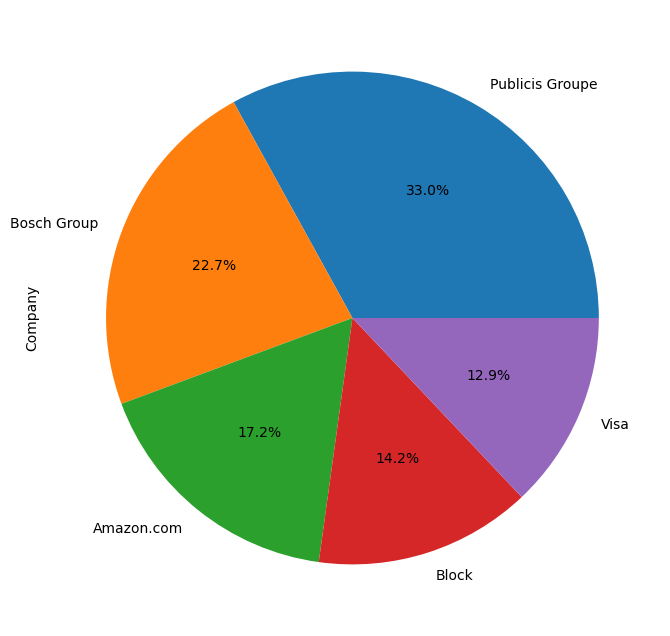

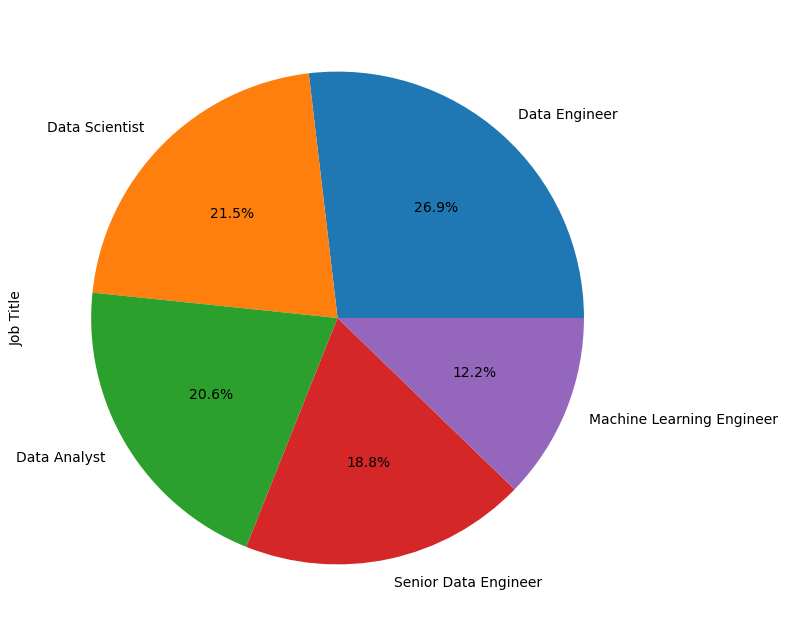

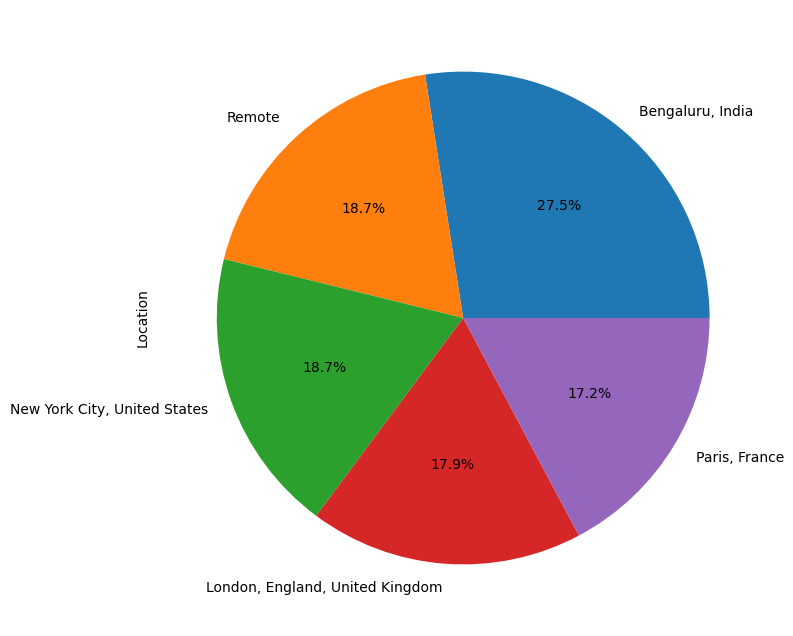

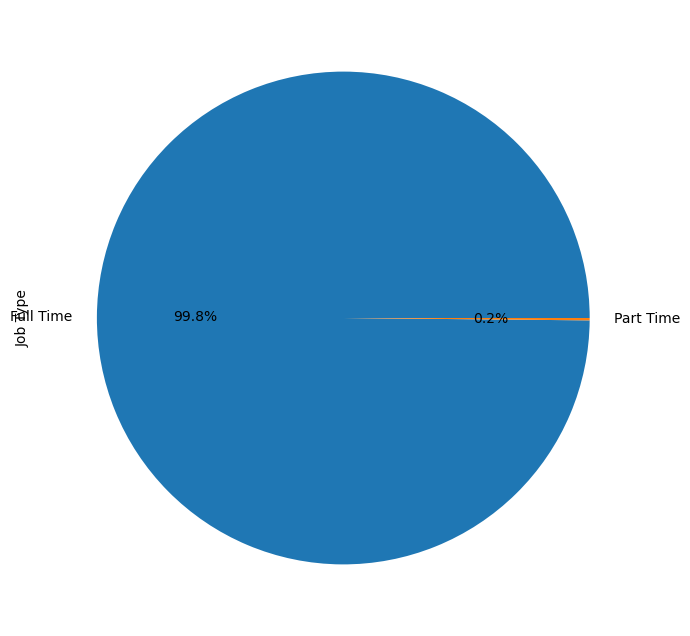

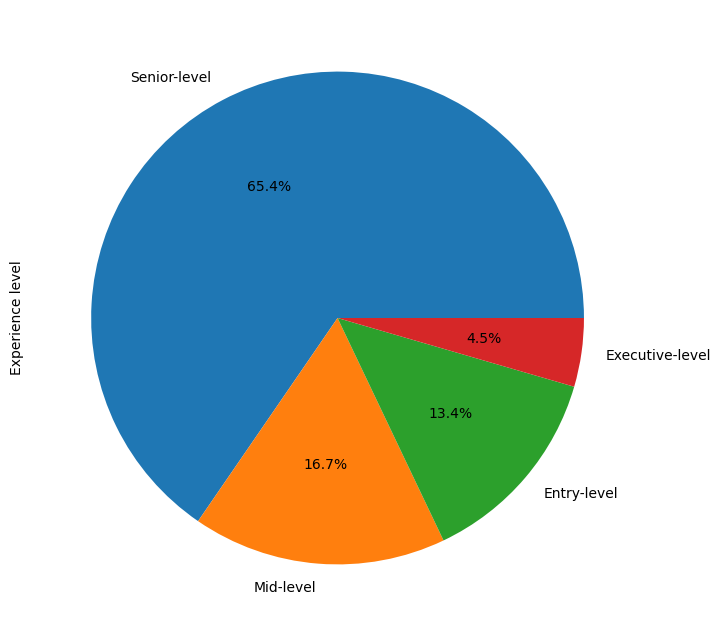

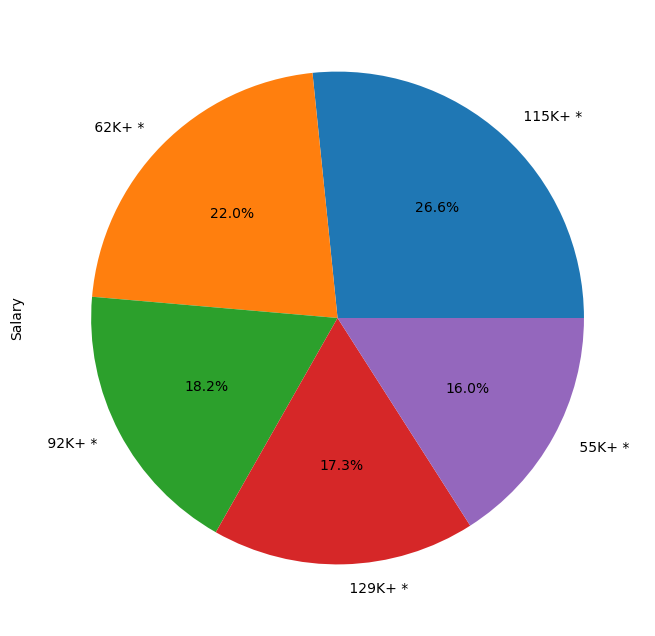

In [10]:
for col in df_Visualisation_pie.columns:
    plt.figure(figsize=(20,8))
    df[col].value_counts().head().plot.pie(autopct='%1.1f%%')
    plt.show()

### Bar Graph

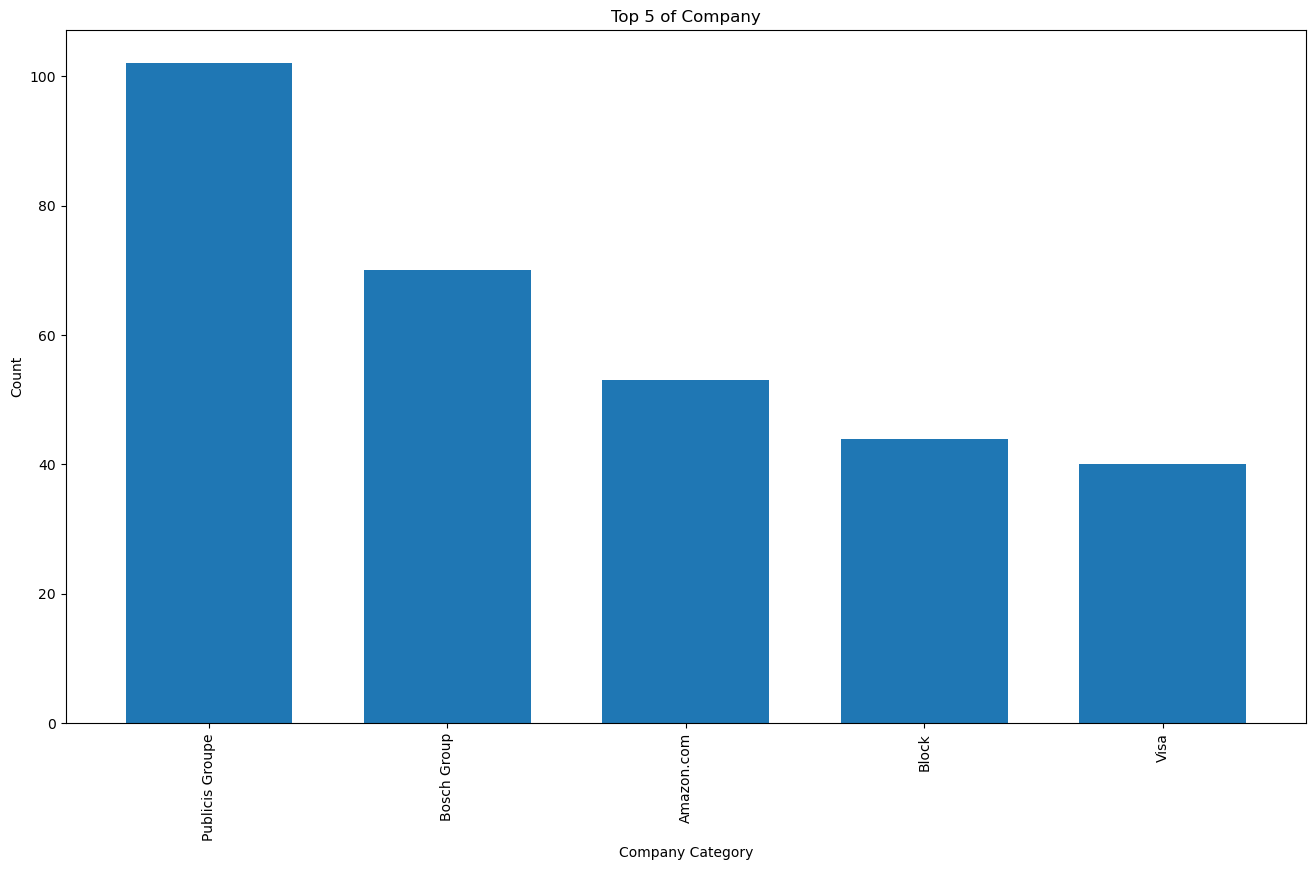

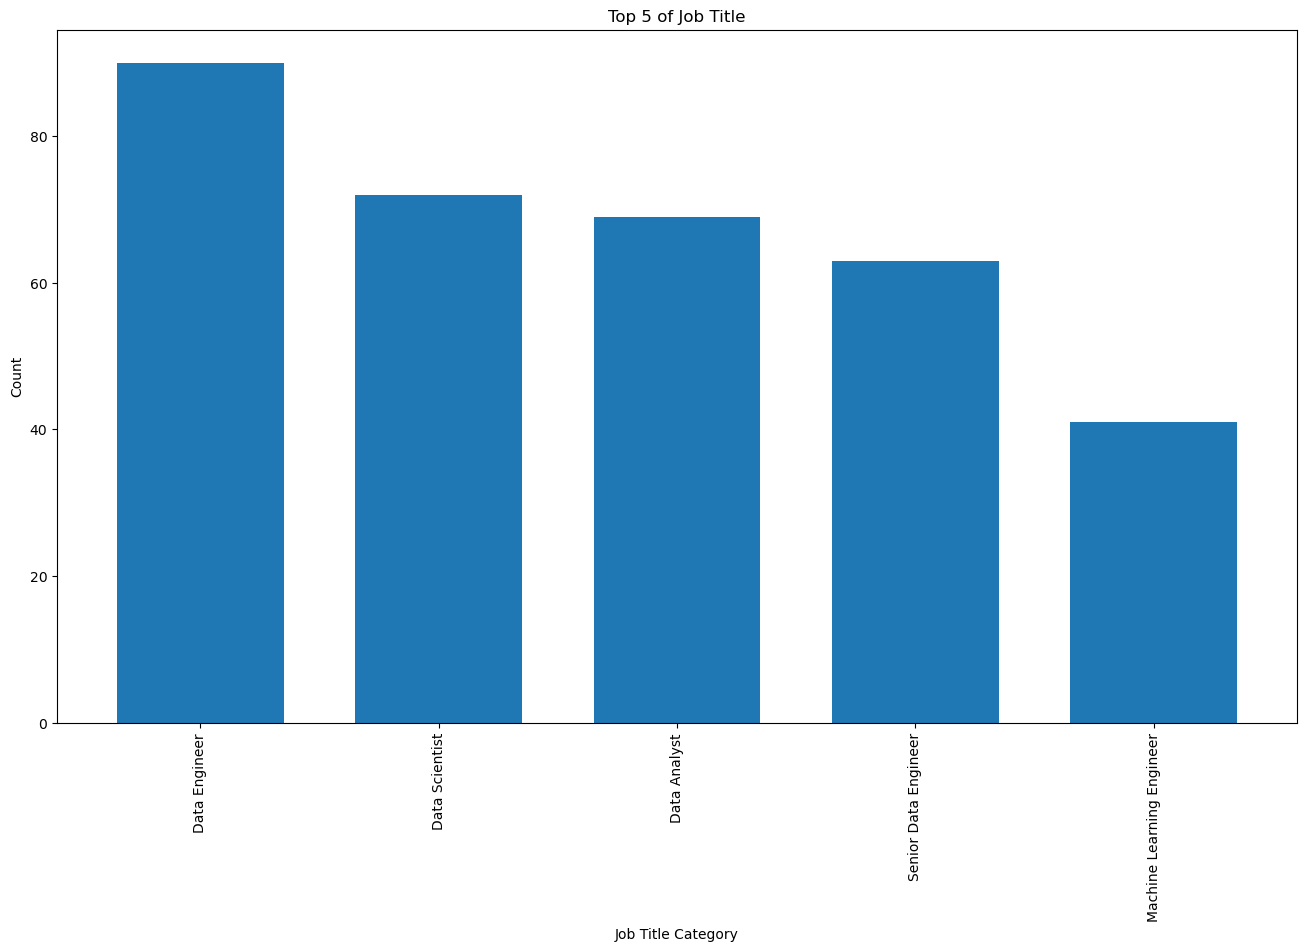

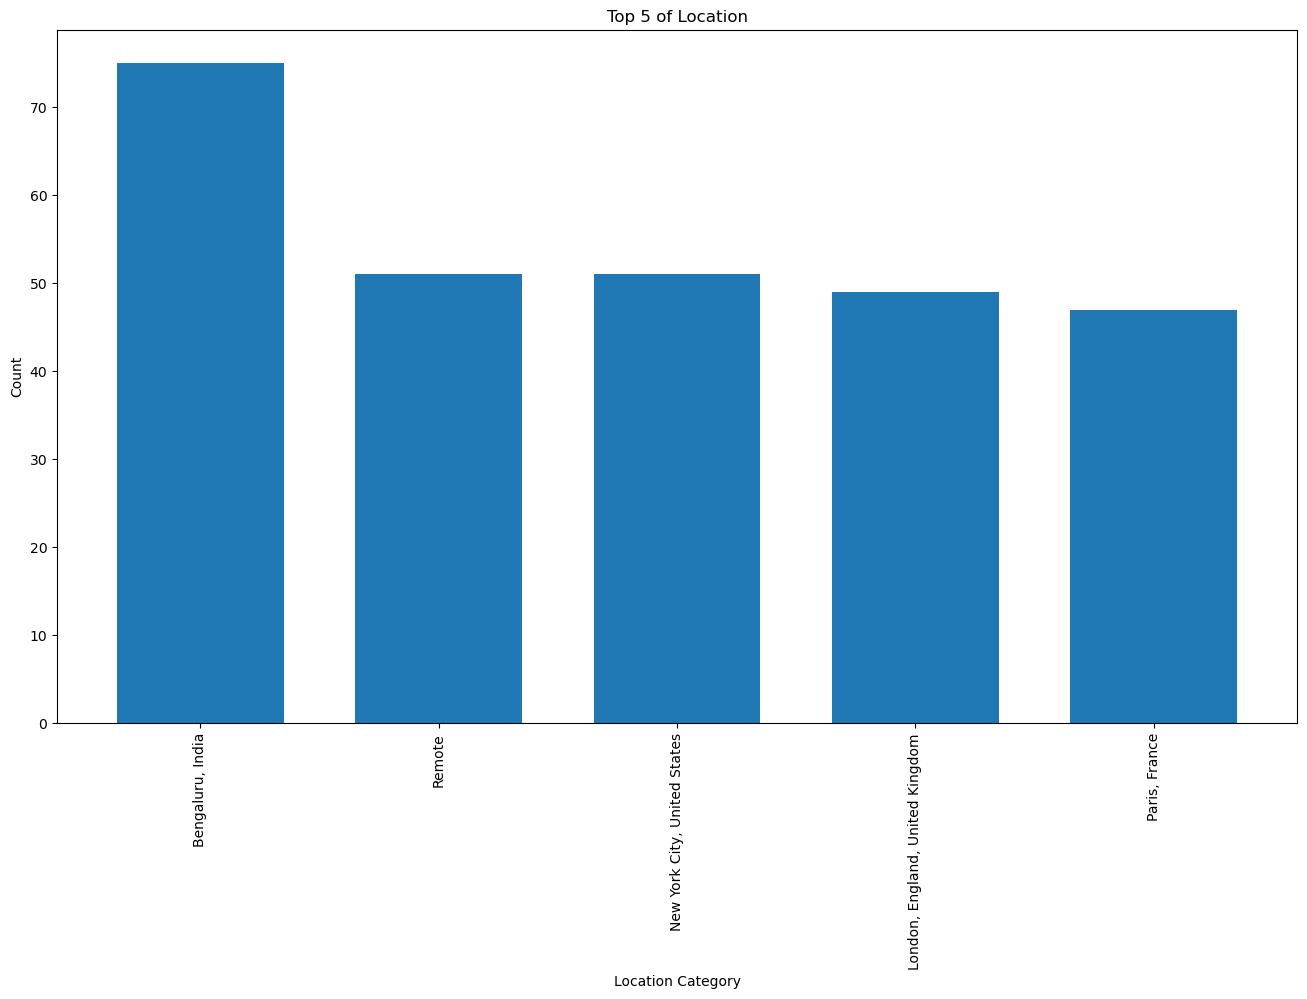

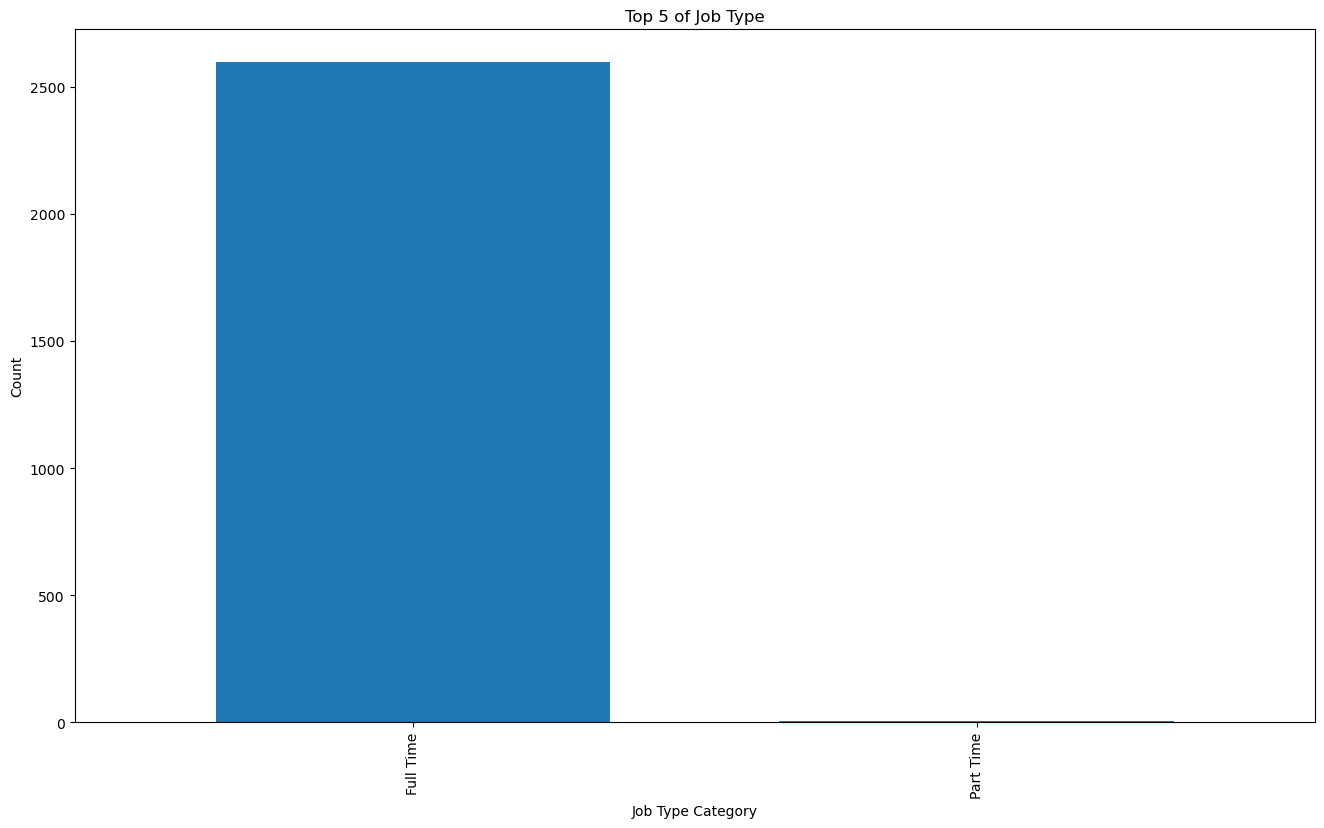

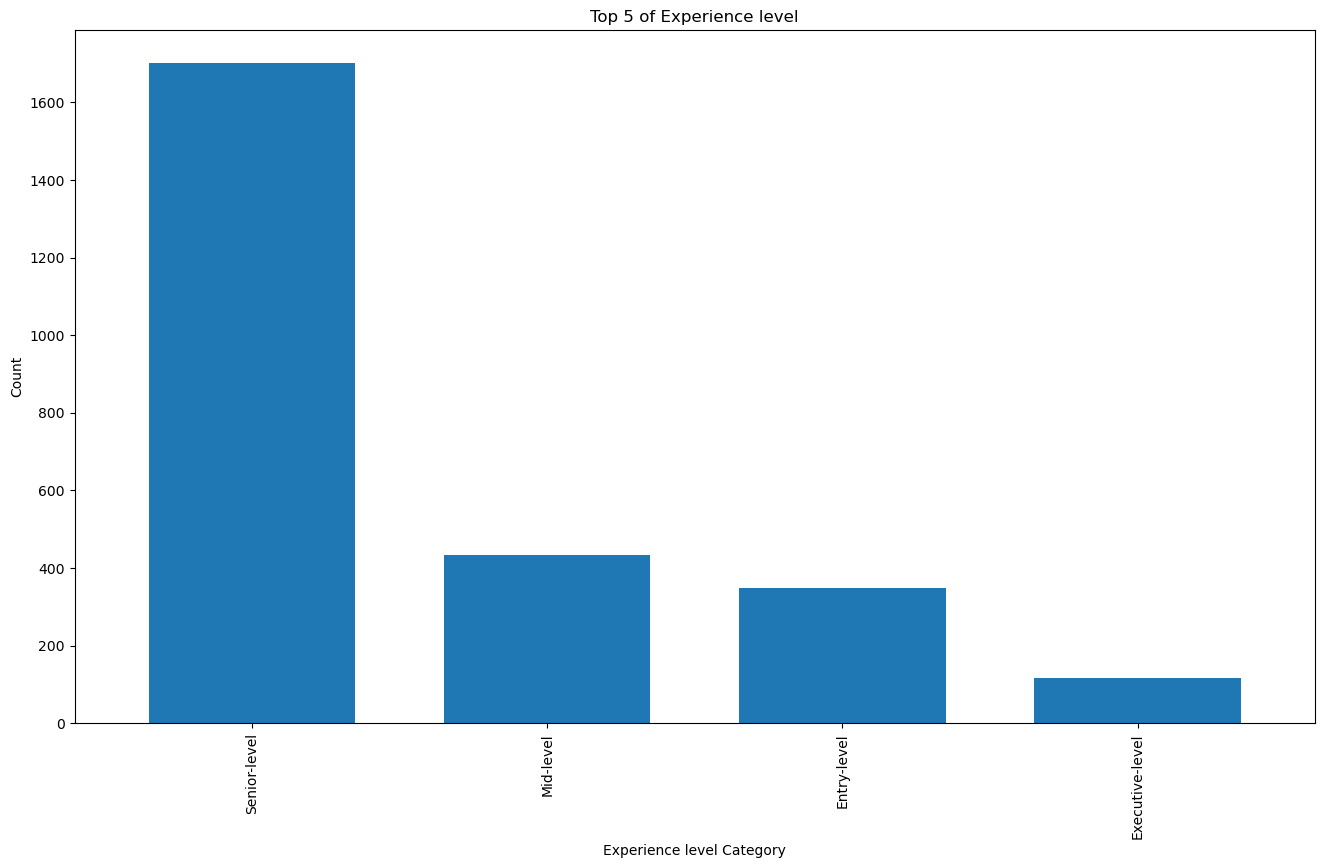

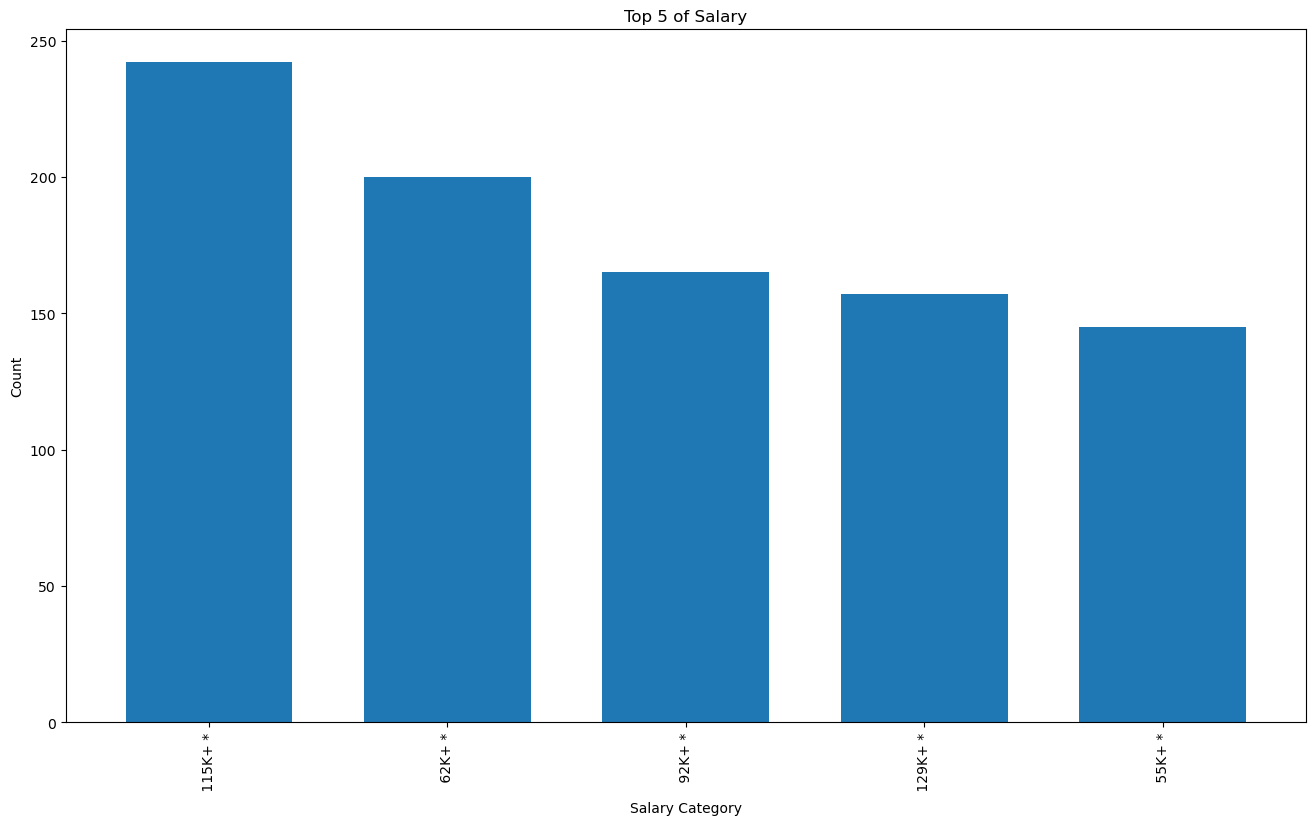

In [12]:
def bar_graph(col):
    data = df[col].value_counts().head(5)
    plt.figure(figsize=(16,9))
    data.plot(kind='bar', width=0.7)
    plt.title(f'Top 5 of {col}')
    plt.xlabel(f'{col} Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
    
for col in df_Visualisation_bar.columns:
    bar_graph(col)

## Analysis for NLP

### Graph Bar for Requirment list

In [13]:
df_Requirment = df.groupby('Experience level')['Requirment of the company '].apply(lambda x: ''.join(x)).reset_index()

In [14]:
def List_Requirment(data):
    df_List_Requirment = df_Requirment[df_Requirment['Experience level'] == data]['Requirment of the company ']
    Requirment_list = [skill.strip() for skills in df_List_Requirment for skill in skills.split(',') if skill.strip() != ' ']
    Requirment_list = list(filter(lambda x: x != '', Requirment_list))
    
    Requirment_counts = pd.Series(Requirment_list).value_counts().head(6)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(Requirment_counts.index, Requirment_counts.values)
    
    # Customize the plot
    plt.xlabel('Requirment of the company')
    plt.ylabel('Frequency')
    plt.title(f'Requirment list for {data}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

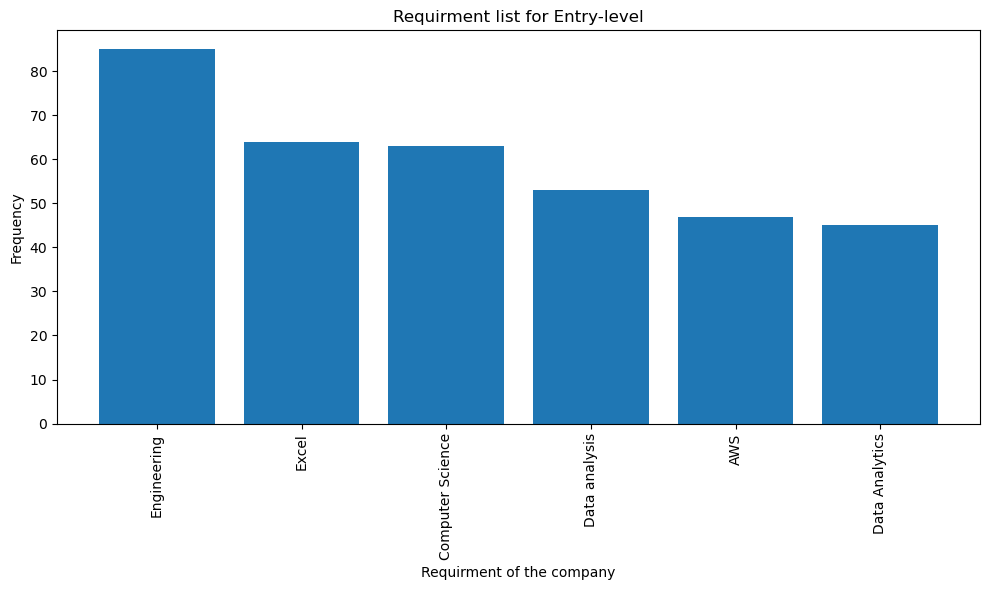

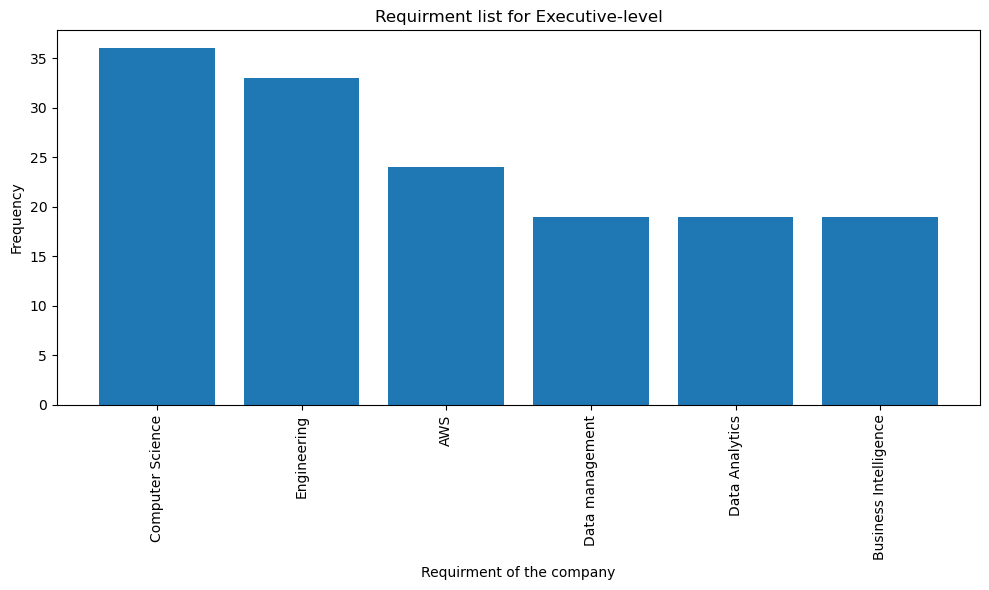

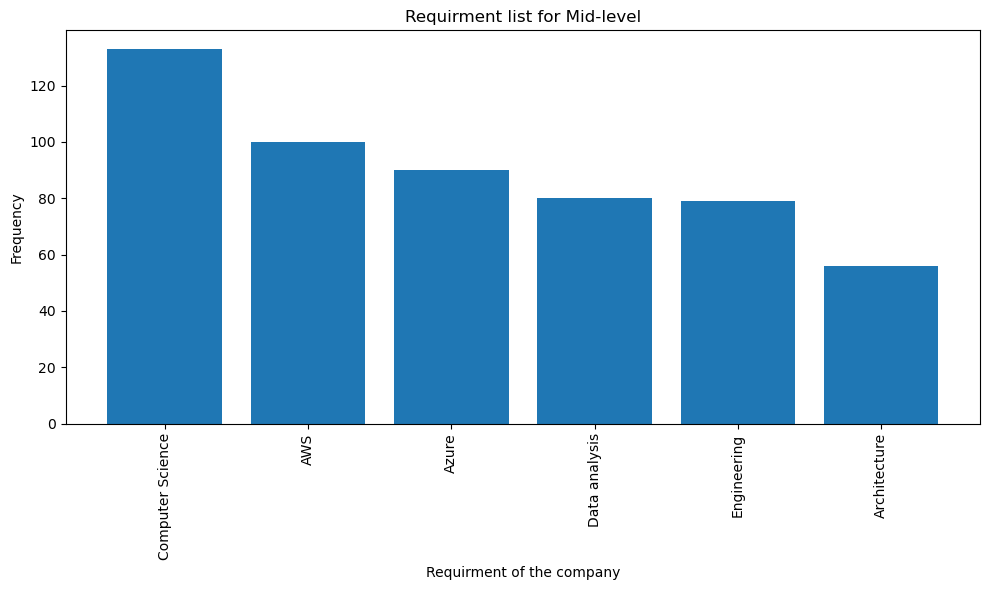

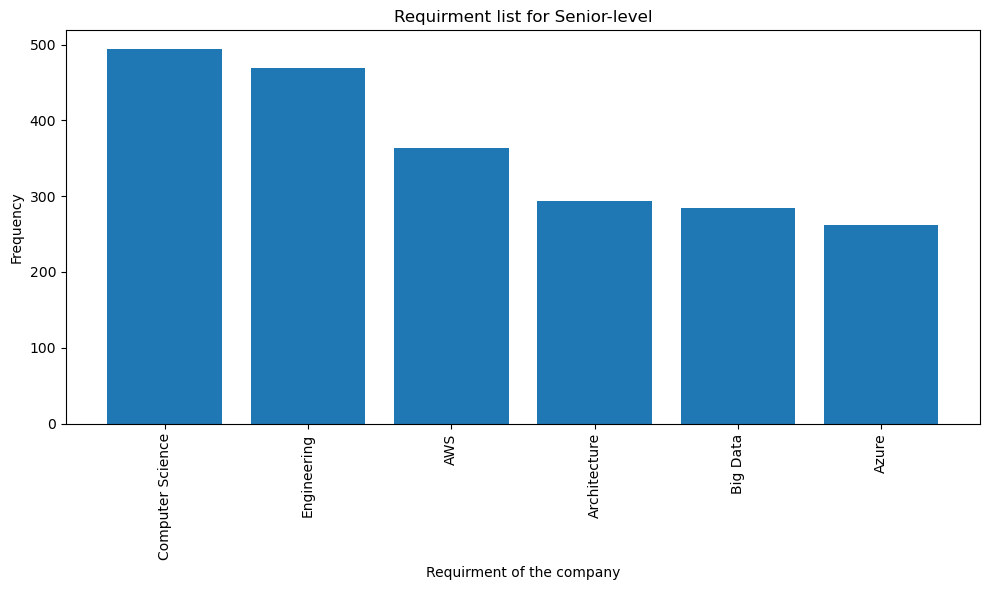

In [15]:
for data in df_Requirment['Experience level'].unique():
    List_Requirment(data)

### WordCloud Requirment for Experience Level

In [16]:
df_Requirment = df.groupby('Experience level')['Requirment of the company '].apply(lambda x: ''.join(x)).reset_index()

In [17]:
def WorCloud(data):
    df_WordCloud = df_Requirment[df_Requirment['Experience level'] == data]
    text_data =  df_WordCloud['Requirment of the company '].str.cat(sep=', ')
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='White').generate(text_data)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {data}', pad = 20, size = 16)
    plt.axis('off')
    plt.show()

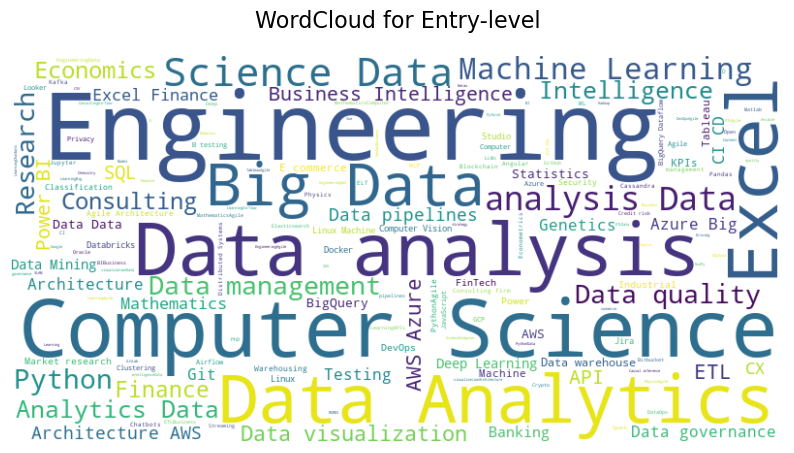

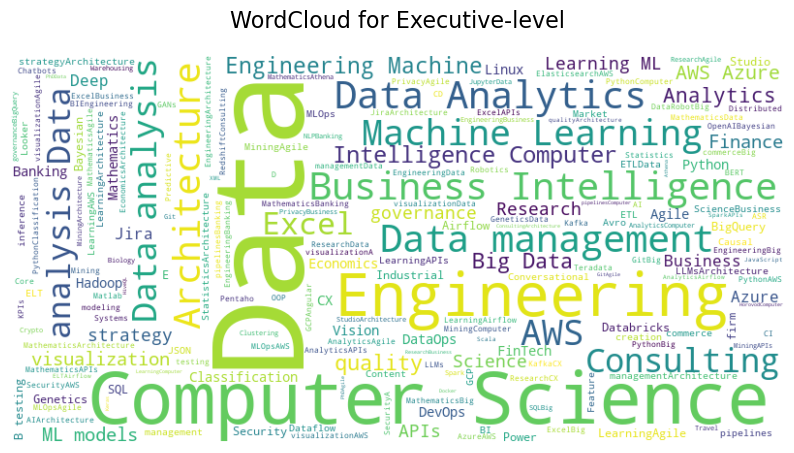

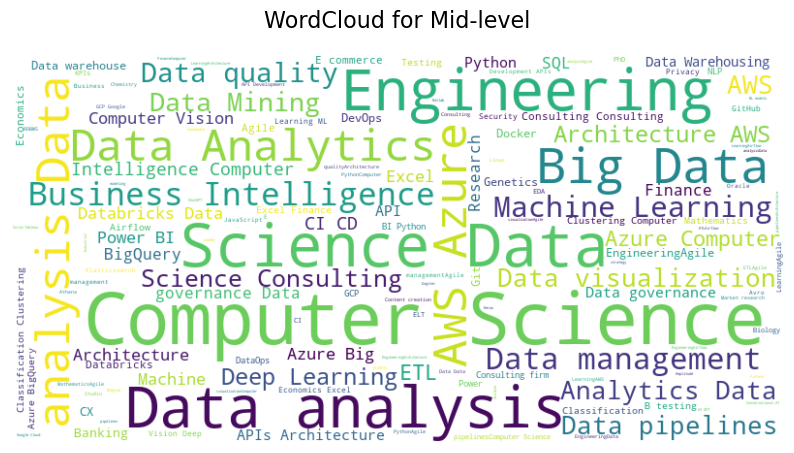

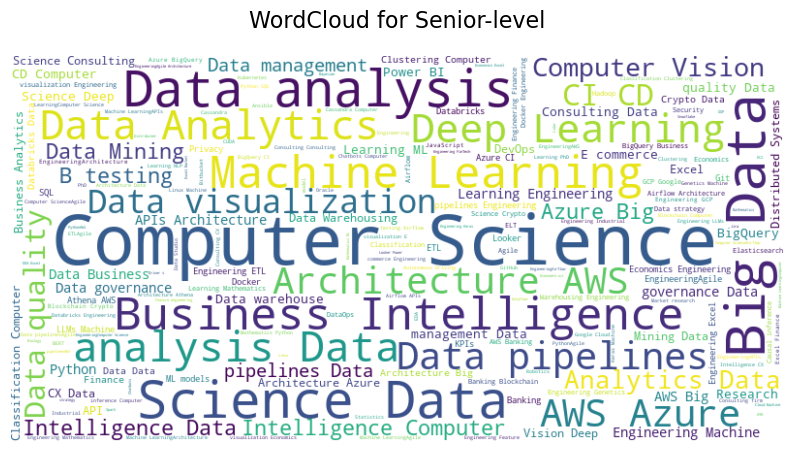

In [18]:
for data in df_Requirment['Experience level'].unique():
    WorCloud(data)

### Graph Bar for Facilities list

In [19]:
df_Facilities = df.groupby('Experience level')['Facilities'].apply(lambda x: ''.join(x)).reset_index()

In [20]:
def List_Facilites(data):
    df_List_Facilities = df_Facilities[df_Facilities['Experience level'] == data]['Facilities']
    Facilities_list = [skill.strip() for skills in df_List_Facilities for skill in skills.split(',') if skill.strip() != ' ']
    Facilities_list = list(filter(lambda x: x != '', Facilities_list))
    
    Facilities_counts = pd.Series(Facilities_list).value_counts().head(6)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(Facilities_counts.index, Facilities_counts.values)
    
    # Customize the plot
    plt.xlabel('Facilites of the company')
    plt.ylabel('Frequency')
    plt.title(f'Facilites for {data}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

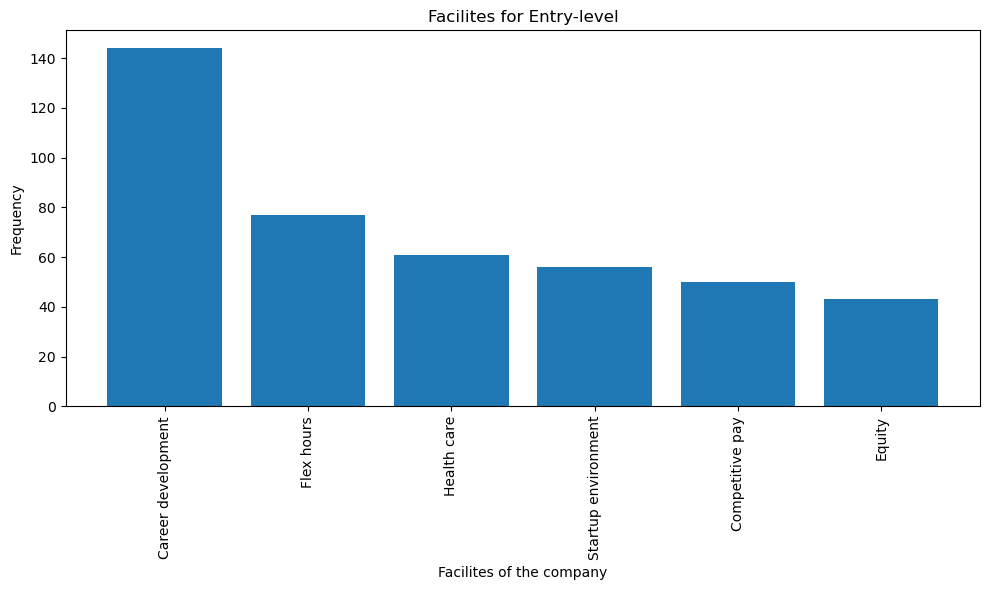

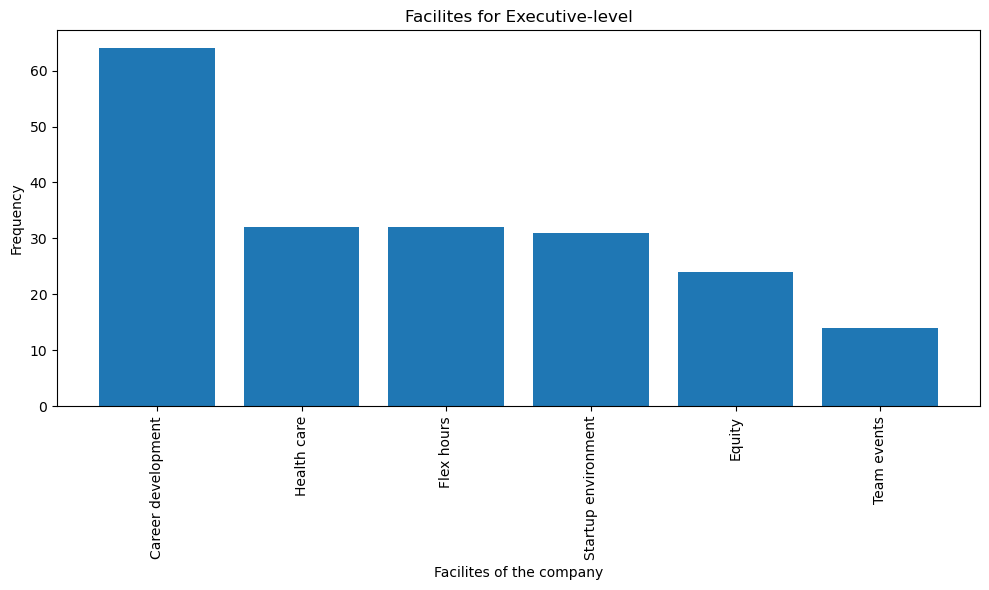

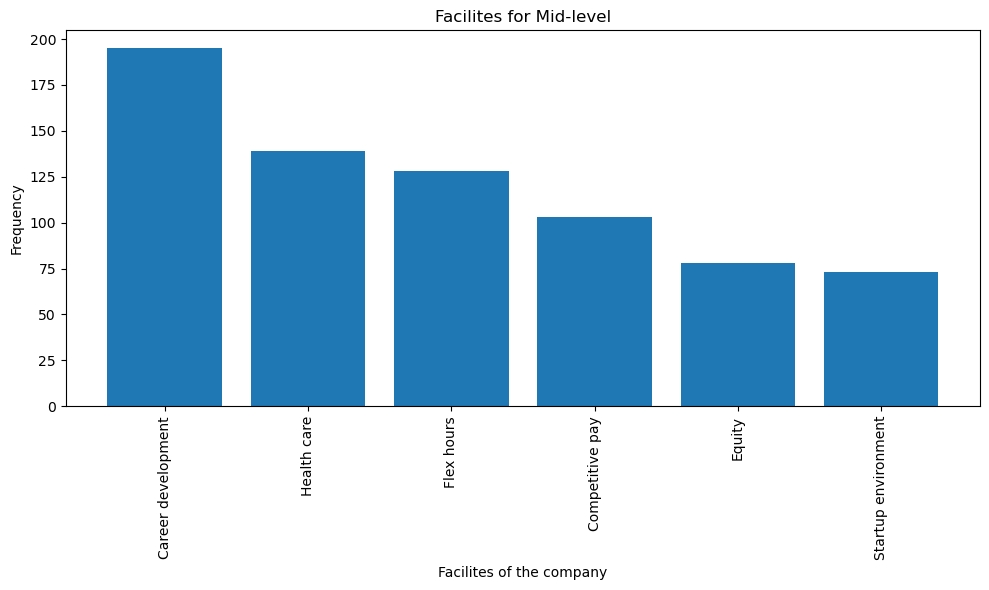

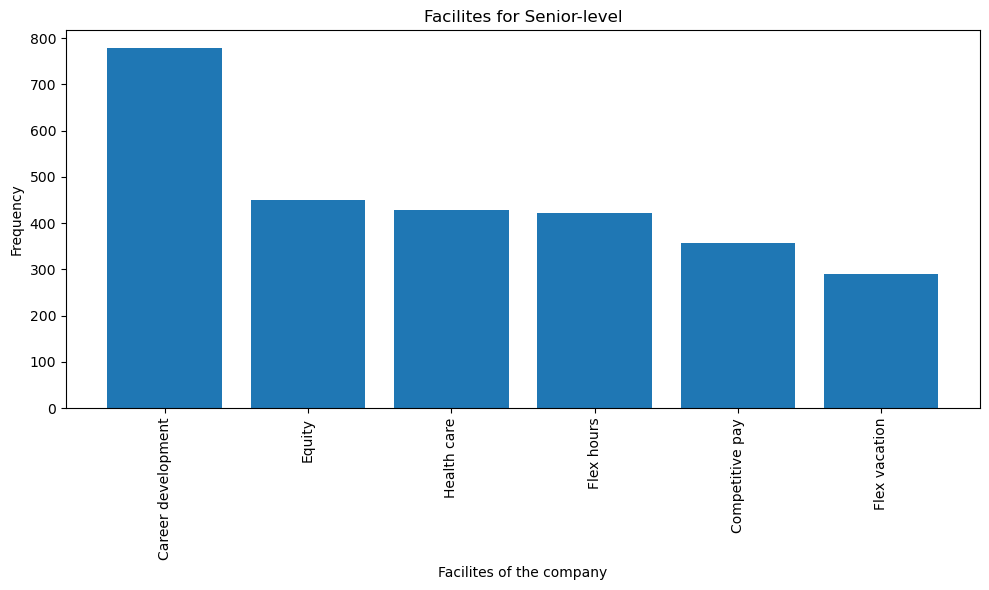

In [21]:
for data in df_Facilities['Experience level'].unique():
    List_Facilites(data)

### WordCloud Facilities for Experience Level

In [22]:
df_Facilities = df.groupby('Experience level')['Facilities'].apply(lambda x: ''.join(x)).reset_index()

In [23]:
def WorCloud(data):
    df_WordCloud = df_Facilities[df_Facilities['Experience level'] == data]
    text_data = df_WordCloud['Facilities'].str.cat(sep=', ')
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='White').generate(text_data)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {data}', pad = 20, size = 16)
    plt.axis('off')
    plt.show()

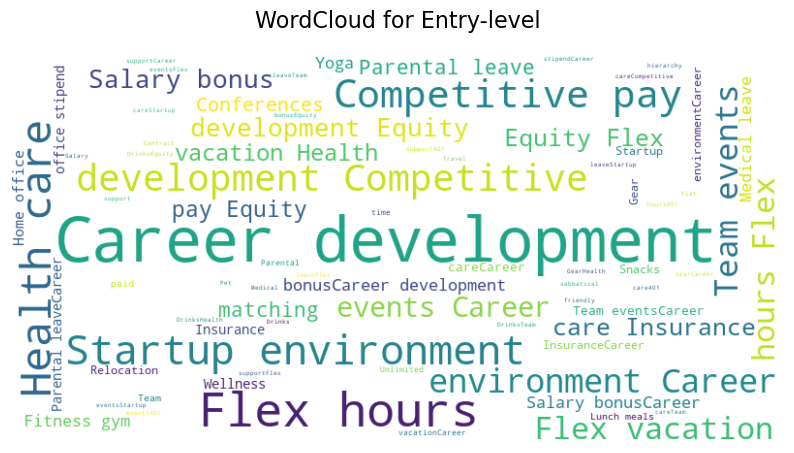

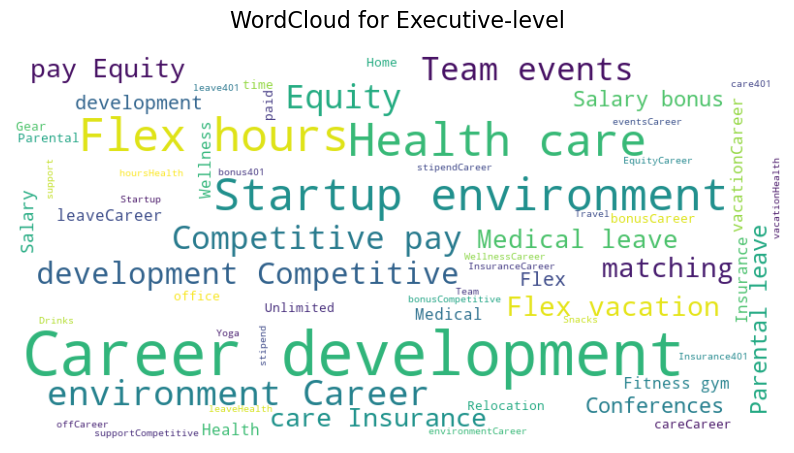

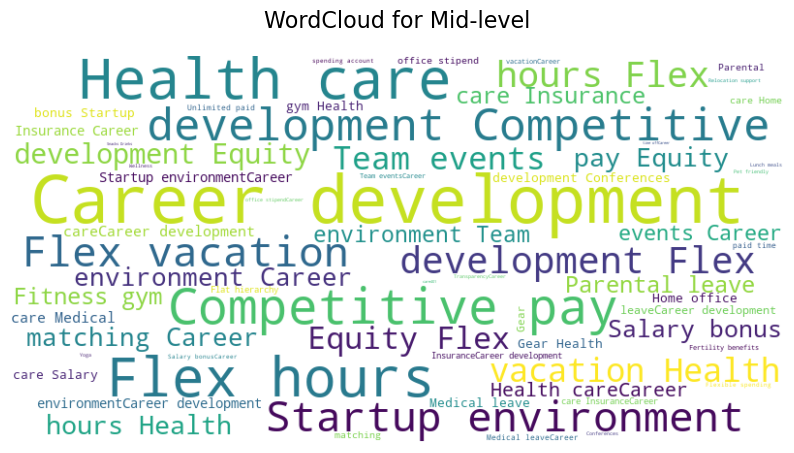

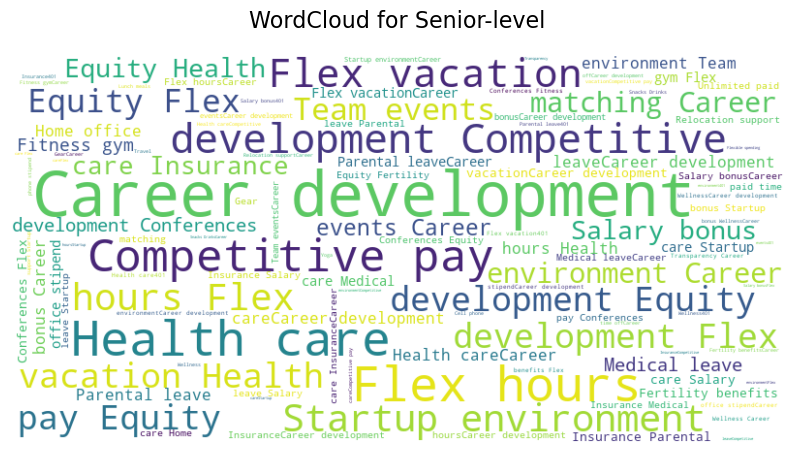

In [24]:
for data in df_Facilities['Experience level'].unique():
    WorCloud(data)